In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import urllib
import json
import time
import os
from pathlib import Path
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from platform import python_version
import os
from sklearn.preprocessing import LabelEncoder

In [3]:
python_version()

'3.9.18'

# Formal analysis

In [8]:
os.chdir("C:\\Users\\omkarp\\Downloads\\Hannes\\Trips\\") 
df_analysis = pd.read_csv('GOTtemporal.csv', index_col=0)
df_analysis['Date'] = pd.to_datetime(df_analysis['Date'], errors='coerce')
df_analysis['month'] = df_analysis['Date'].dt.strftime('%b')
df_analysis['Day'] = df_analysis['Date'].dt.strftime('%a')
df_analysis = df_analysis.drop(columns={'Date','min precip'})
df_analysis.rename(columns={'count_trip': 'demand', 'Day': 'weekday'}, inplace=True)
df_analysis

,demand,avg temp,max temp,min temp,avg precip,max precip,avg Wind speed,max Wind speed,min Wind speed,month,weekday
0,3991.0,4.483333,7.2,1.8,0.379167,3.4,3.275000,6.0,1.8,Jan,Sat
1,2501.0,7.137500,8.0,6.2,0.116667,1.1,3.075000,6.0,1.9,Jan,Sun
2,2626.0,6.437500,7.0,4.4,0.070833,0.7,4.416667,6.3,2.7,Jan,Mon
3,434.0,-2.929167,0.9,-5.5,0.000000,0.0,1.512500,4.2,0.0,Jan,Thu
4,2456.0,1.820833,4.0,-3.2,0.408333,1.9,2.866667,3.6,1.0,Jan,Fri
...,...,...,...,...,...,...,...,...,...,...,...
293,2999.0,13.462500,14.1,12.8,0.175000,2.9,3.566667,4.7,2.7,Oct,Thu
294,2873.0,13.812500,14.2,12.8,0.312500,3.6,3.329167,4.6,2.2,Oct,Fri
295,2606.0,12.870833,14.6,12.2,0.000000,0.0,5.245833,6.1,3.5,Oct,Sat
296,2359.0,13.395833,16.2,11.8,0.004167,0.1,2.320833,3.5,1.4,Oct,Sun


In [9]:
column_frequency = df_analysis['weekday'].value_counts()
column_frequency

weekday
Thu    42
Sun    39
Mon    39
Wed    39
Sat    38
Fri    38
Tue    37
Name: count, dtype: int64

In [10]:
resultfjfj = df_analysis.groupby(['month', 'weekday']).size().reset_index(name='Count')
pivot_result = resultfjfj.pivot_table(index='month', columns='weekday', values='Count', fill_value=0)
pivot_result

weekday,Fri,Mon,Sat,Sun,Thu,Tue,Wed
month,,,,,,,
Apr,5.0,4.0,5.0,4.0,4.0,4.0,4.0
Aug,4.0,5.0,4.0,4.0,4.0,5.0,5.0
Dec,2.0,2.0,2.0,2.0,3.0,2.0,2.0
Feb,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Jan,3.0,4.0,5.0,5.0,4.0,3.0,3.0
Jul,4.0,4.0,4.0,5.0,4.0,3.0,4.0
Jun,1.0,3.0,1.0,2.0,2.0,3.0,3.0
Mar,3.0,3.0,3.0,3.0,4.0,3.0,3.0
May,1.0,2.0,1.0,2.0,2.0,2.0,2.0


In [11]:
label_encoder = LabelEncoder()
df_analysis['month'] = df_analysis['month'].astype('category')
df_analysis['weekday'] = df_analysis['weekday'].astype('category')
df_analysis['month'] = label_encoder.fit_transform(df_analysis['month'])
df_analysis['weekday'] = label_encoder.fit_transform(df_analysis['weekday'])

df_analysis = df_analysis.astype(float)
np.isinf(df_analysis).sum()

demand            0
avg temp          0
max temp          0
min temp          0
avg precip        0
max precip        0
avg Wind speed    0
max Wind speed    0
min Wind speed    0
month             0
weekday           0
dtype: int64

<Axes: xlabel='demand', ylabel='Count'>

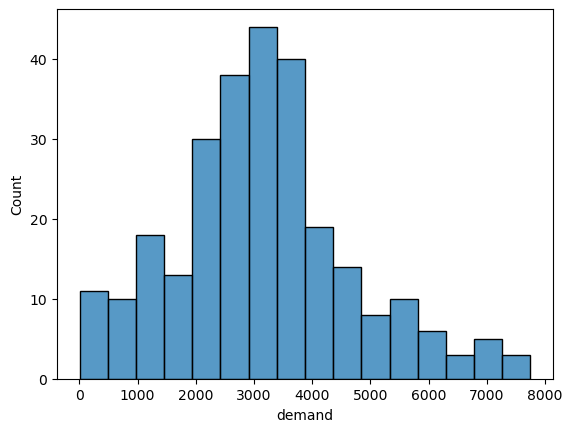

In [13]:
sns.histplot(df_analysis['demand'])

In [14]:
df_analysis['demand'].mean()

3154.8051470588234

In [15]:
df_analysis['demand'].median()

3065.0

In [16]:
df_analysis.columns


Index(['demand', 'avg temp', 'max temp', 'min temp', 'avg precip',
       'max precip', 'avg Wind speed', 'max Wind speed', 'min Wind speed',
       'month', 'weekday'],
      dtype='object')

[Text(0, 0.5, 'weekday'),
 Text(0, 1.5, 'month'),
 Text(0, 2.5, 'avg temp'),
 Text(0, 3.5, 'max temp'),
 Text(0, 4.5, 'min temp'),
 Text(0, 5.5, 'avg precip'),
 Text(0, 6.5, 'max precip'),
 Text(0, 7.5, 'avg Wind speed'),
 Text(0, 8.5, 'max Wind speed'),
 Text(0, 9.5, 'min Wind speed')]

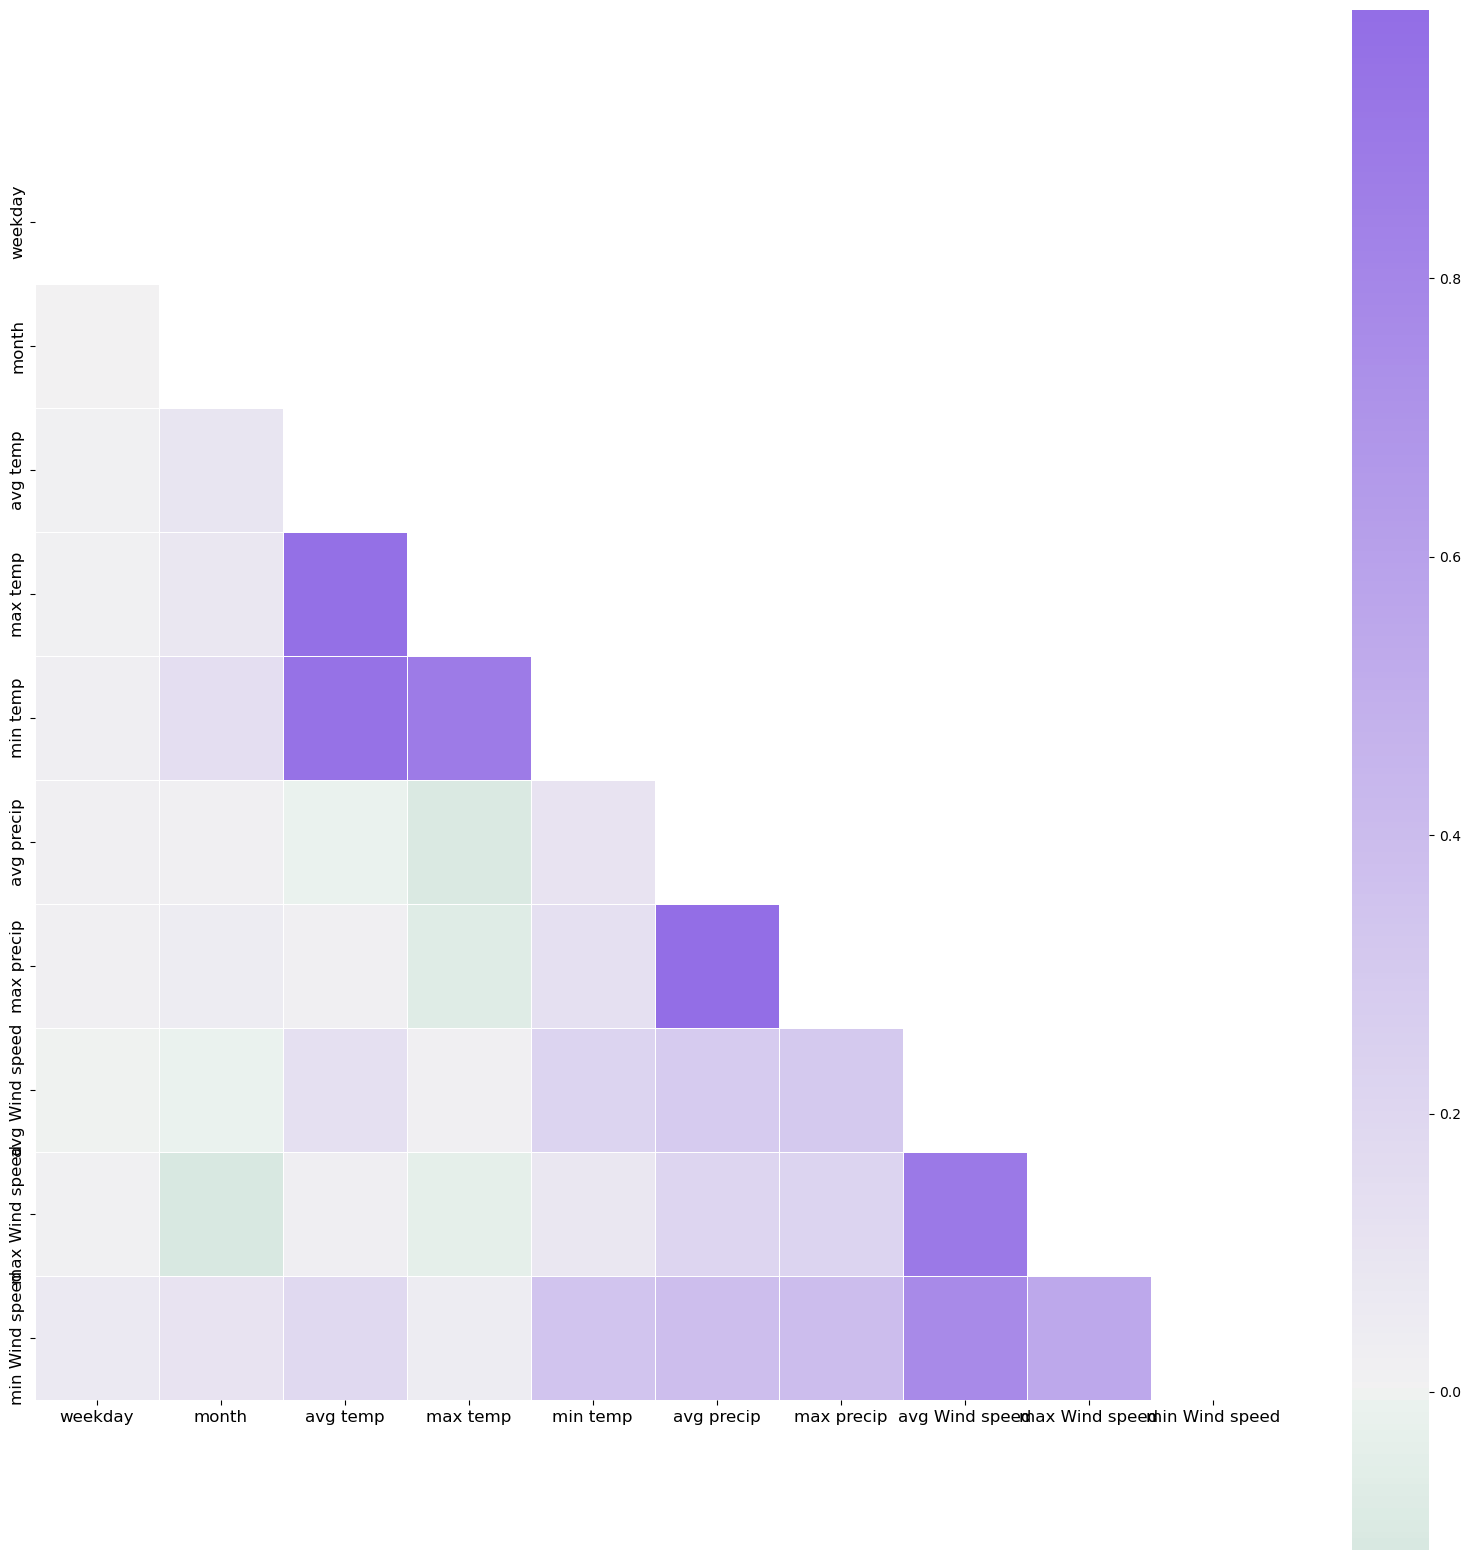

In [17]:
features_1 = ['weekday', 'month', 'avg temp', 'max temp', 'min temp',
       'avg precip', 'max precip', 'avg Wind speed',
       'max Wind speed', 'min Wind speed']
corr = df_analysis[features_1].corr('spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True,linewidths=.5, cbar_kws={"shrink": 1})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12)
#plt.savefig(f"{'C:/Users/gkun/Desktop/files_BBSdemand/Figures/'}{'correlations.png'}", bbox_inches='tight',dpi = 600 )

In [18]:
corr

,weekday,month,avg temp,max temp,min temp,avg precip,max precip,avg Wind speed,max Wind speed,min Wind speed
weekday,1.000000,0.006460,0.012730,0.010747,0.029547,0.024174,0.022701,0.001611,0.007749,0.064279
month,0.006460,1.000000,0.097347,0.082941,0.143040,0.021375,0.043827,-0.012830,-0.113638,0.110259
avg temp,0.012730,0.097347,1.000000,0.972338,0.958029,-0.008181,0.017958,0.132279,0.032283,0.183410
max temp,0.010747,0.082941,0.972338,1.000000,0.884300,-0.100810,-0.073895,0.024001,-0.040057,0.042826
min temp,0.029547,0.143040,0.958029,0.884300,1.000000,0.106486,0.130629,0.226276,0.083027,0.341175
avg precip,0.024174,0.021375,-0.008181,-0.100810,0.106486,1.000000,0.992907,0.296590,0.216058,0.386589
max precip,0.022701,0.043827,0.017958,-0.073895,0.130629,0.992907,1.000000,0.305644,0.226207,0.392168
avg Wind speed,0.001611,-0.012830,0.132279,0.024001,0.226276,0.296590,0.305644,1.000000,0.903278,0.768718
max Wind speed,0.007749,-0.113638,0.032283,-0.040057,0.083027,0.216058,0.226207,0.903278,1.000000,0.544871
min Wind speed,0.064279,0.110259,0.183410,0.042826,0.341175,0.386589,0.392168,0.768718,0.544871,1.000000


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
df_analysis = df_analysis.astype(float)

In [21]:
features_test =['weekday', 'month',  'min temp',
       'avg precip', 'max precip',
       'max Wind speed', 'min Wind speed']

# 'avg Wind speed', 'avg temp', 'max temp',

col_test = df_analysis[features_test]
vif_data = pd.DataFrame()
vif_data["feature"] = col_test.columns
vif_data["VIF"] = [variance_inflation_factor(col_test.values, i)
                          for i in range(len(col_test.columns))]
print(vif_data)

          feature       VIF
0         weekday  2.806754
1           month  2.634569
2        min temp  2.059592
3      avg precip  7.487775
4      max precip  7.963729
5  max Wind speed  6.343802
6  min Wind speed  5.044405


[Text(0, 0.5, 'weekday'),
 Text(0, 1.5, 'month'),
 Text(0, 2.5, 'min T'),
 Text(0, 3.5, 'max P'),
 Text(0, 4.5, 'max W'),
 Text(0, 5.5, 'min W')]

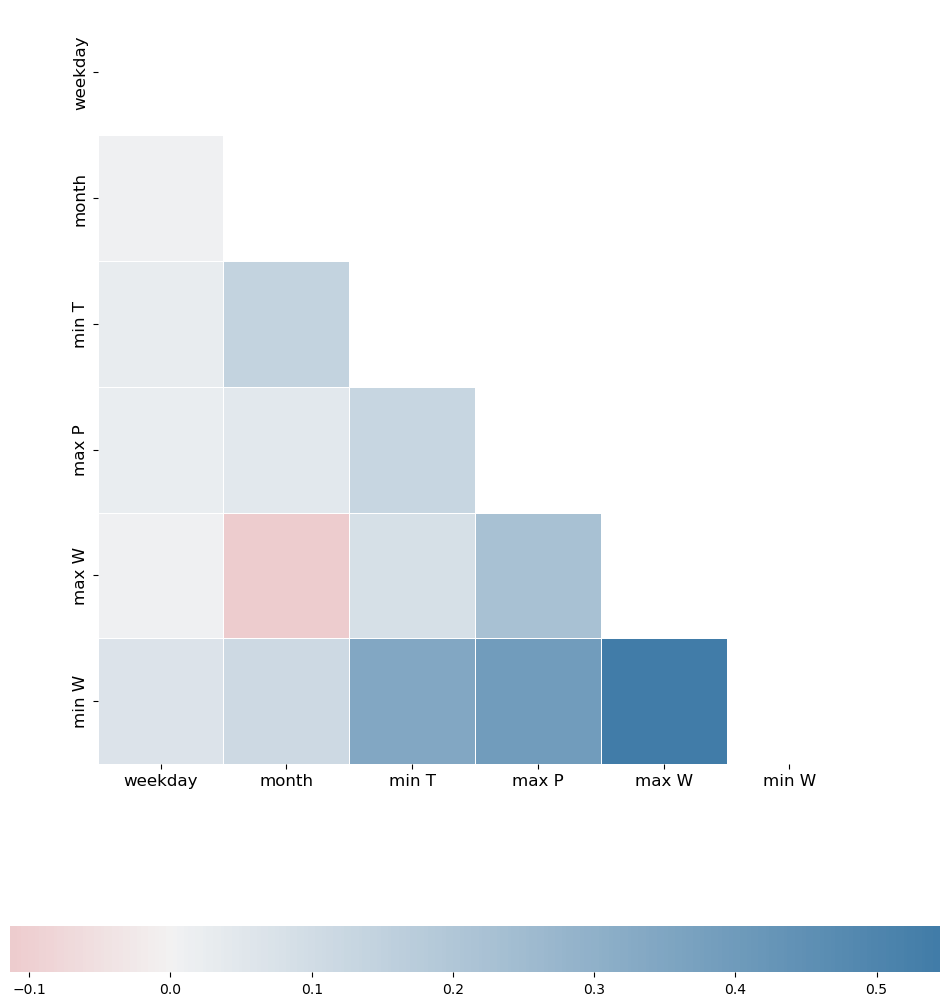

In [22]:
features =  ['weekday', 'month', 'min temp','max precip','max Wind speed', 'min Wind speed']
#Dropped: income, education, distance, pop.dens, 'malepop %',

#features_test = ['living_area', 'parkSquare', 'industry', 'leisure', 'education', 'commerial_land_use_ratio', 'living_land_use_ratio', 'public_land_use_ratio', 'parksquare_land_use_ratio', 'industry_land_use_ratio', 'first_road', 'secon_road', 'third_road', 'fouth_road', 'subway_ratio']
names = ['weekday', 'month', 'min T','max P','max W', 'min W']
corr2 = df_analysis[features].corr('spearman')
mask = np.triu(np.ones_like(corr2, dtype=bool))
f, ax = plt.subplots(figsize=(20, 14))
cmap = sns.diverging_palette(10, 240, n=11, as_cmap=True)
g = sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=None, center=0,square=True,linewidths=.5, cbar_kws={"shrink":0.6,"orientation":'horizontal'})
g.set_xticklabels(names, fontsize = 12)
g.set_yticklabels(names, fontsize = 12)
#plt.savefig(f"{'C:/Users/gkun/Desktop/files_BBSdemand/Figures/'}{'correlations_reduc.jpg'}", bbox_inches='tight',dpi = 600 )

In [23]:
col_test = df_analysis[features]
vif_data = pd.DataFrame()
vif_data["feature"] = col_test.columns
vif_data["VIF"] = [variance_inflation_factor(col_test.values, i)
                          for i in range(len(col_test.columns))]
print(vif_data)

          feature       VIF
0         weekday  2.802494
1           month  2.588327
2        min temp  2.043029
3      max precip  1.285343
4  max Wind speed  6.320926
5  min Wind speed  5.038470


# Random Forest


In [40]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
parameter = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
clf_rf = GridSearchCV(
    regressor_rf,
    parameter,
    scoring=['r2', 'neg_mean_squared_error'],  # List of scoring metrics
    refit='r2',  # Choose the best model based on R2 score
    cv=kf,
    verbose=2  # For detailed output, adjust as needed
)
clf_rf.fit(X, y)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_esti

C:\Users\omkarp\AppData\Local\anaconda3\envs\omkarp\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2700 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2700 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omkarp\AppData\Local\anaconda3\envs\omkarp\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omkarp\AppData\Local\anaconda3\envs\omkarp\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\omkarp\AppData\Local\anaconda3\envs\omkarp\lib\site-packages\sklearn\base.py", lin

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'], verbose=2)

In [41]:
clf_rf.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [42]:
print(sklearn.__version__)

1.3.2


In [43]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
parameters_rf = clf_rf.best_params_
regressor_rf = RandomForestRegressor(**parameters_rf, random_state=42)
model_rf = regressor_rf.fit(X,y)

In [44]:
model_t = model_rf
scores_r = cross_val_score(model_t, X, y, cv=KFold(n_splits=5, shuffle=True), scoring= 'r2')
scores_rmse = cross_val_score(model_t, X, y, cv=KFold(n_splits=5, shuffle=True), scoring= 'neg_root_mean_squared_error')
scores_ev = cross_val_score(model_t, X, y, cv=KFold(n_splits=5, shuffle=True), scoring= 'explained_variance')
print("r2  " + str(scores_r.mean()))
print("scores_rmse " + str(abs(scores_rmse.mean())))
print("scores_ev " + str(scores_ev.mean()))

r2  0.4133677362276952
scores_rmse 1211.2351952581848
scores_ev 0.39549946814287607


In [59]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

model_t = model_rf
kf = KFold(n_splits=10, shuffle=True)

scores_r = cross_val_score(model_t, X, y, cv=kf, scoring='r2')
for i, score in enumerate(scores_r, 1):
    print(f"Fold {i} R2 score: {score:.2f}")
print("Mean R2 score: " + str(scores_r.mean()))

scores_rmse = cross_val_score(model_t, X, y, cv=kf, scoring='neg_root_mean_squared_error')
for i, score in enumerate(scores_rmse, 1):
    print(f"Fold {i} RMSE score: {abs(score):.2f}")
print("Mean RMSE score: " + str(abs(scores_rmse.mean())))

scores_ev = cross_val_score(model_t, X, y, cv=kf, scoring='explained_variance')
for i, score in enumerate(scores_ev, 1):
    print(f"Fold {i} Explained Variance score: {score:.2f}")
print("Mean Explained Variance score: " + str(scores_ev.mean()))

Fold 1 R2 score: 0.50
Fold 2 R2 score: 0.48
Fold 3 R2 score: 0.33
Fold 4 R2 score: 0.25
Fold 5 R2 score: 0.41
Fold 6 R2 score: 0.45
Fold 7 R2 score: 0.40
Fold 8 R2 score: 0.61
Fold 9 R2 score: 0.35
Fold 10 R2 score: 0.02
Mean R2 score: 0.3804499724457823
Fold 1 RMSE score: 927.44
Fold 2 RMSE score: 1330.09
Fold 3 RMSE score: 1179.50
Fold 4 RMSE score: 1354.47
Fold 5 RMSE score: 1225.31
Fold 6 RMSE score: 1187.73
Fold 7 RMSE score: 1320.61
Fold 8 RMSE score: 1095.65
Fold 9 RMSE score: 860.29
Fold 10 RMSE score: 909.44
Mean RMSE score: 1139.0532951753319
Fold 1 Explained Variance score: 0.71
Fold 2 Explained Variance score: 0.41
Fold 3 Explained Variance score: 0.37
Fold 4 Explained Variance score: 0.50
Fold 5 Explained Variance score: 0.37
Fold 6 Explained Variance score: 0.38
Fold 7 Explained Variance score: -0.05
Fold 8 Explained Variance score: 0.23
Fold 9 Explained Variance score: 0.76
Fold 10 Explained Variance score: 0.69
Mean Explained Variance score: 0.4368766513075416


         features  importances
2        min temp     0.397471
1           month     0.191811
4  max Wind speed     0.113022
5  min Wind speed     0.109285
3      max precip     0.102142
0         weekday     0.086269


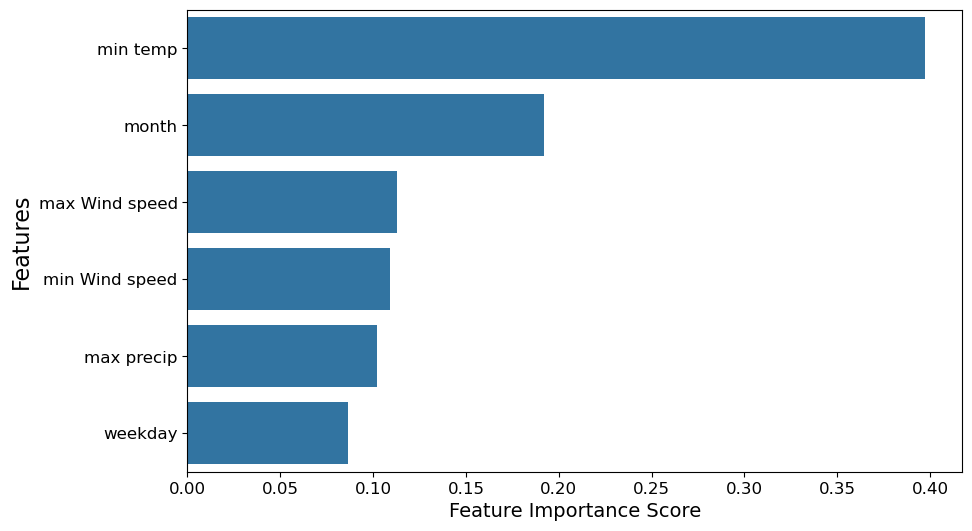

In [58]:
result1 = pd.DataFrame({"features":features,"importances":model_rf.feature_importances_})

result = result1.sort_values(by='importances',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=result['importances'], y=result['features'])

print(result)
plt.xlabel('Feature Importance Score', fontsize='14')
plt.ylabel('Features', fontsize='16')
#plt.title("Visualizing Important Features")
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# XGboost

In [62]:
reg_xgb = xgb.XGBRegressor()
clf_xgb = GridSearchCV(reg_xgb,parameter_xgb, scoring = 'r2', cv=KFold(n_splits=5, shuffle=True))
clf_xgb.fit(X,y)
#reg_xgb.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    in...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [1], 'eta': [0.3],
                         'gamma': [0.001], 'max_depth': [1, 3, 5],
                         'min_child_weight': [1], 'n_estimators': [200, 300],
                         'subsample': [1]},
             scoring='r2')

In [63]:
clf_xgb.best_params_

{'colsample_bytree': 1,
 'eta': 0.3,
 'gamma': 0.001,
 'max_depth': 1,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 1}

In [64]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)

{'colsample_bytree': 1, 'eta': 0.3, 'gamma': 0.001, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1}
0.4242461922227001


In [65]:
params_xgb = {'colsample_bytree': 0.7, 'eta': 0.1, 'gamma': 0.01, 'max_depth': 3, 'min_child_weight': 0.1, 'n_estimators': 200, 'subsample': 1}

In [66]:
reg_xgb = xgb.XGBRegressor(**params_xgb)

In [67]:
model_t = reg_xgb
scores_r = cross_val_score(model_t, X, y, cv=KFold(n_splits=5, shuffle=True), scoring= 'r2')
scores_rmse = cross_val_score(model_t, X, y, cv=KFold(n_splits=5, shuffle=True), scoring= 'neg_root_mean_squared_error')
scores_ev = cross_val_score(model_t, X, y, cv=KFold(n_splits=5, shuffle=True), scoring= 'explained_variance')
print("r2  " + str(scores_r.mean()))
print("scores_rmse " + str(abs(scores_rmse.mean())))
print("scores_ev " + str(scores_ev.mean()))

r2  0.4092261115971171
scores_rmse 1145.0467911844548
scores_ev 0.3831060147243461


In [70]:
model_xgb2 = xgb.XGBRegressor(**params_xgb).fit(X,y)

In [71]:
model_xgb2.feature_importances_

array([0.10849972, 0.28632665, 0.25917202, 0.1548264 , 0.09411056,
       0.09706469], dtype=float32)

         features  importances
1           month     0.286327
2        min temp     0.259172
3      max precip     0.154826
0         weekday     0.108500
5  min Wind speed     0.097065
4  max Wind speed     0.094111


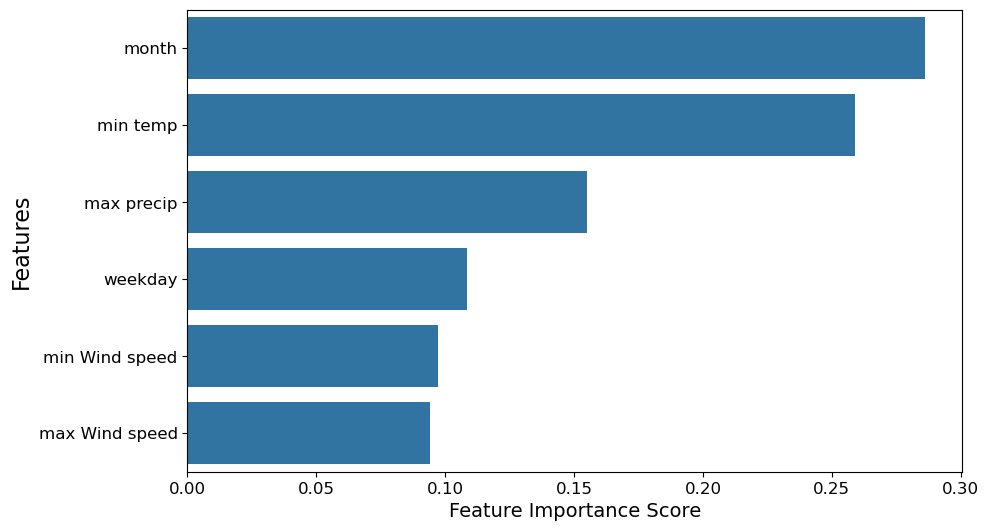

In [72]:
resultxgb = pd.DataFrame({"features":features,
        "importances":model_xgb2.feature_importances_})

result = resultxgb.sort_values(by='importances',ascending=False)
plt.figure(figsize=(10,3))
sns.barplot(x=result['importances'], y=result['features'])
print(result)
plt.xlabel('Feature Importance Score', fontsize='14')
plt.ylabel('Features', fontsize='16')
#plt.title("Visualizing Important Features")
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)